# scikit-learn 中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [5]:
X2[:5]

array([[ 1.        , -2.42731039,  5.89183574],
       [ 1.        , -1.1892334 ,  1.41427607],
       [ 1.        ,  2.97919223,  8.87558632],
       [ 1.        , -0.3104026 ,  0.09634978],
       [ 1.        , -2.28611994,  5.22634437]])

In [6]:
X[:5]

array([[-2.42731039],
       [-1.1892334 ],
       [ 2.97919223],
       [-0.3104026 ],
       [-2.28611994]])

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_predict = lin_reg.predict(X2)

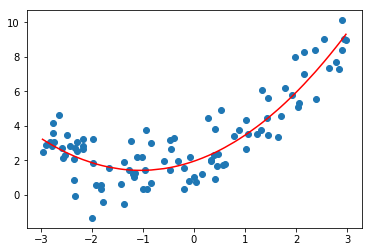

In [8]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [9]:
lin_reg.coef_

array([0.        , 1.01522347, 0.48684016])

In [10]:
lin_reg.intercept_

1.9568056125014162

### 关于 PolynomialFeatures

当 degree = 3

如果原特征为

$$x_1, x_2$$

则零次项：

$$1$$

一次项：

$$x_1, x_2$$

二次项：

$$x_1^2, x_2^2, x_1x_2$$

三次项：

$$x_1^3, x_2^3, x_1^2x_2, x_1x_2^2$$

共十项，可以看出随着 degree ，多项式项数指数级增加，功能强大，但会带来一些问题

In [11]:
X = np.arange(1, 11).reshape(-1, 2)

In [12]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [13]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### Pipeline

将多项式特征、数据归一化、线性回归三步合成一步

In [14]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

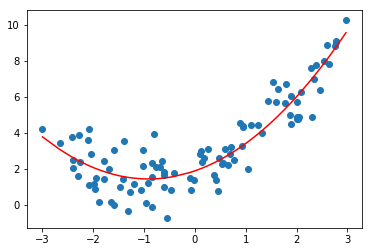

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()